<a href="https://colab.research.google.com/github/njokinjuguna/Machine-learning-Models/blob/main/cancerpredictiveanalysisinkenyaModified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analytics in Cancer Care: Leveraging Machine Learning for Early Detection and Resource Optimization in Kenya’s Referral Hospitals**

# **Chapter 1: Introduction**

##**1.1 Problem Statement**

Cancer ranks as the third leading cause of death in Kenya, following infectious and cardiovascular diseases (Macharia et al., 2020; Ferlay et al., 2024). In 2022, the country reported 44,726 new cancer cases and 29,317 deaths, underscoring the critical need for effective interventions (Ferlay et al., 2024). Among these, breast, cervical, and prostate cancers collectively account for nearly 37.3% of all cases, with an age-standardized incidence rate of 149.1 per 100,000 and a 5-year prevalence of 102,152 cases. These figures highlight not only the growing prevalence of cancer but also systemic challenges, including late-stage diagnoses, regional disparities in healthcare access, and limited diagnostic resources.

Kenyatta National Hospital (KNH) and Moi Teaching and Referral Hospital (MTRH), Kenya’s primary referral centers for cancer care, face significant strain in managing this burden. Late-stage presentations are common, and resource allocation remains inequitable, particularly in underserved regions. While infection-attributable cancers have been extensively studied, there is limited research on leveraging data-driven approaches, such as machine learning (ML), to improve diagnostic accuracy, optimize resource utilization, and guide public health policies.

This research aims to address these challenges by employing ML techniques to predict cancer types, optimize diagnostic pathways, and identify critical factors influencing cancer outcomes. By focusing on predictive analytics, the study seeks to provide actionable insights for early detection and equitable resource allocation, improving the quality of cancer care in Kenya’s healthcare system.

## **1.2 Objective**

**Primary Objective: **

1.To develop and evaluate machine learning models for predicting cancer types and optimizing diagnostic pathways in Kenya’s referral hospitals.

**Secondary Objectives: **

1.Identify key demographic, clinical, and diagnostic features influencing cancer prediction accuracy.

2.Evaluate the effectiveness of diagnostic methods used at KNH and MTRH.

3.Assess regional disparities in cancer diagnosis and outcomes to provide actionable recommendations.

4.Propose a framework for integrating ML insights into hospital workflows and public health policies.

## **1.3 Research Questions**

**Primary Research Question: **

1.How can machine learning models improve early cancer diagnosis and optimize diagnostic resource allocation in Kenya’s referral hospitals?

**Secondary Research Questions: **

2.What demographic and clinical factors significantly influence cancer type prediction in Kenya?

3.Which diagnostic methods are most effective for specific cancer types based on historical hospital data?

4.How do regional disparities between KNH and MTRH affect cancer outcomes, and how can ML address these gaps?

5.How can insights from ML models guide public health strategies for cancer prevention and early detection in Kenya?

## **1.4 Data Description**

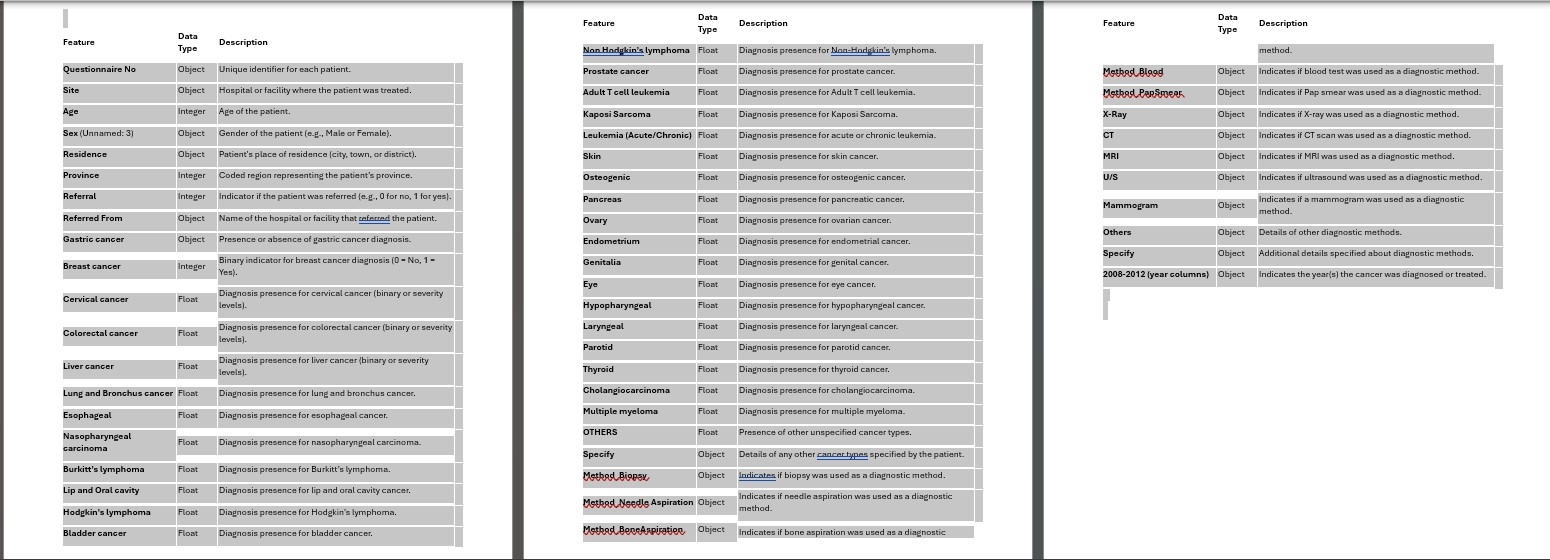

#**Exploratory Data Analysis**

## **Importing the necessary libraries and overview of the dataset**

In [124]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

###**Loading the data sets**

In [126]:
import pandas as pd

# Paths to the two files
file1_path = 'KNH_Data.xlsx'
file2_path = 'MTRH_Data.xlsx'

# Load each file's 'Cleaned DB' sheet into DataFrames
df1 = pd.read_excel(file1_path, sheet_name='Cleaned DB')
df2 = pd.read_excel(file2_path, sheet_name='Cleaned DB')
df2

,Questionnaire No,Site,Age,Sex,Residence,Province,Referral,Referred From,Gastric cancer,Breast cancer,...,MRI,U/S,Mammogram,others,Specify,2008,2009,2010,2011,2012
0,E001,MTRH,59,F,POKOT,6,Yes,kapenguria D Hospital,NaN,NaN,...,NaN,NaN,NaN,yes,OGD,NaN,NaN,NaN,NaN,yes
1,E002,MTRH,29,M,MAKUENI,3,no,NaN,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
2,E003,MTRH,18,M,NANDI N.,6,NO,NaN,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
3,E004,MTRH,90,M,KEIYO,6,YES,plateau Hospital,NaN,NaN,...,NaN,NaN,NaN,yes,Endoscopy,NaN,NaN,NaN,NaN,yes
4,E005,MTRH,34,F,BUSIA,7,no,NaN,NaN,NaN,...,NaN,NaN,NaN,yes,OGD,NaN,NaN,NaN,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,B150,MTRH,18,F,UASIN GISHU,6,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
496,B151,MTRH,25,F,UASIN GISHU,6,YES,ampath,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
497,B152,MTRH,50,F,UASIN GISHU,6,YES,ampath,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
498,B153,MTRH,44,F,BUNGOMA,7,YES,bungoma D hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN


### **Standardization and concatination of the 2 datasets**

In [127]:
# Standardizing column names in KNH to match MTRH
column_names_mtrh = df2.columns.tolist()  # Getting column names from MTRH
df1.columns = column_names_mtrh  # Applying these column names to KNH
# Concatenate the two DataFrames after standardizing column names
combined_data= pd.concat([df1, df2], ignore_index=True)
# Copying data to another variable to avoid any changes to the original data
combined_df = combined_data.copy()
combined_df.head()


,Questionnaire No,Site,Age,Sex,Residence,Province,Referral,Referred From,Gastric cancer,Breast cancer,...,MRI,U/S,Mammogram,others,Specify,2008,2009,2010,2011,2012
0,A001,KNH,67,M,Tharaka nithi,3,0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
1,A002,KNH,31,M,nyeri,1,0,nyeri PGH,NaN,0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
2,A003,KNH,62,M,kirinyaga,1,1,private clinic,NaN,0,...,NaN,NaN,NaN,yes,paraendoscopy,yes,NaN,NaN,NaN,NaN
3,A004,KNH,25,M,kisii,7,0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
4,A005,KNH,29,M,machakos,3,1,st. Marys-langata,NaN,0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN


**Observation**

*Patient Identifiers:*
•	The Questionnaire No column serves as a unique identifier for each patient.
•	The Site column indicates the hospital (e.g., "KNH").

*Demographics:*
•	Includes columns like Age, Gender, and Residence.

*Medical Information:*
•	Columns like Gastric cancer, Breast cancer, and other similar columns seem to represent diagnoses (binary or categorical values).
•	Diagnostic tests such as MRI, U/S, and Mammogram are also recorded.

*Administrative Information:*
•	Province indicates the region, potentially coded numerically.
•	Referral and Referred From provide information on patient referral history.

*Time-Specific Data:*
•	Columns labeled 2008 to 2012 could indicate whether the patient received care in those years.

*Missing Data:*
•	There are NaN values in several columns, such as diagnostic tests and years, indicating missing information.



In [128]:
combined_df.tail()

,Questionnaire No,Site,Age,Sex,Residence,Province,Referral,Referred From,Gastric cancer,Breast cancer,...,MRI,U/S,Mammogram,others,Specify,2008,2009,2010,2011,2012
995,B150,MTRH,18,F,UASIN GISHU,6,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
996,B151,MTRH,25,F,UASIN GISHU,6,YES,ampath,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
997,B152,MTRH,50,F,UASIN GISHU,6,YES,ampath,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
998,B153,MTRH,44,F,BUNGOMA,7,YES,bungoma D hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
999,B154,MTRH,36,M,NANDI,6,YES,tenwek hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN


**Observation**

From the tail() results, we can make the following observations on the last 5 rows of the concatenated dataset (combining records from KNH and MTRH):
1.	Dataset Origin:
The last rows are labeled with Site as "MTRH," indicating that they belong to the MTRH dataset.
2.	Demographics:
The Age column shows a range of ages (e.g., 18, 25, 50, 44, 36), and Sex indicates both males and females, with the majority being female in this subset.
3.	Provinces and Referrals:
Province codes, such as 6 and 7, indicate different regions.
Referral values include both YES and no, signifying whether the patient was referred from another facility.
4.	Missing Data:
Many columns, such as Gastric cancer, Breast cancer, MRI, U/S, and Mammogram, contain NaN values, which may indicate missing or unavailable information for these diagnostic categories.
5.	Referred From:
Facilities like "ampath," "bungoma D hospital," and "tenwek hospital" are listed, providing insights into the referral network for MTRH patients.
6.	Time-Specific Columns:
Columns for years (2008, 2009, etc.) are populated with consistent values (e.g., "yes" or NaN), which may indicate whether care was received during those years.


### **Checking the shape of the dataset**

In [129]:
combined_df.shape

(1000, 58)



*   The dataset contains contains **1000 rows and 58 columns**.




### **Checking the info()**

In [130]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 58 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Questionnaire No                                             1000 non-null   object 
 1   Site                                                         1000 non-null   object 
 2   Age                                                          1000 non-null   int64  
 3   Sex                                                          1000 non-null   object 
 4   Residence                                                    1000 non-null   object 
 5   Province                                                     1000 non-null   int64  
 6   Referral                                                     999 non-null    object 
 7   Referred From                                                538 non-null    ob

**Data Types:**

50 columns are of object type (categorical or textual data).
6 columns are of float64 type, indicating numerical data with potential missing values.
2 columns are of int64 type, representing numerical data without missing values.

**Missing Data:**

Many columns have significant missing values, with some columns having almost no data (e.g., Burkitt’s lymphoma and Adult T cell leukemia both have 0 non-null values).
Some critical columns, like Referral (999 non-null) and Referred From (538 non-null), have partial missing data.
Diagnostic and testing methods, such as MRI (16 non-null) and Mammogram (12 non-null), have very sparse data.
Columns such as 2008, 2009, 2010, etc., have varying levels of completeness, possibly indicating care or diagnosis records for those years.

**Imbalanced Data:**

Many cancer types (e.g., Lung and Bronchus cancer, Thyroid, Eye, etc.) have very few non-null entries compared to others like Breast cancer (577 non-null).
Imbalances suggest that some types of cancers are more frequently diagnosed or recorded in the dataset.

**Well-Populated Columns:**

Core demographic columns like Questionnaire No, Site, Age, Sex, Residence, and Province are fully populated, indicating no missing values for these key variables.
Testing methods like Method_Biopsy (901 non-null) and Method_Blood (998 non-null) are also well-documented.

**Column Names:**

Some column names have inconsistent spacing (e.g., Breast cancer and Lung and Bronchus cancer have leading spaces).
Duplicates or near-duplicates might exist (OTHERS vs. others and Specify appearing twice).


### **Summary of the data**

In [131]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.190,15.874631,18.0,37.0,49.0,61.0,95.0
Province,1000.0,4.505,2.266520,0.0,3.0,6.0,6.0,7.0
Burkitt’s lymphoma,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adult T cell leukemia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eye,6.0,1.000,0.000000,1.0,1.0,1.0,1.0,1.0
Hypopharyngeal,11.0,1.000,0.000000,1.0,1.0,1.0,1.0,1.0
Parotid,4.0,1.000,0.000000,1.0,1.0,1.0,1.0,1.0
Thyroid,7.0,1.000,0.000000,1.0,1.0,1.0,1.0,1.0


In [132]:
combined_df.describe(exclude = 'number').T

,count,unique,top,freq
Questionnaire No,1000,633,A001,2
Site,1000,2,KNH,500
Sex,1000,3,F,581
Residence,1000,178,UASIN GISHU,114
Referral,999,7,1,330
Referred From,538,154,private clinic,128
Gastric cancer,42,4,1,26
Breast cancer,577,5,0,441
Cervical cancer,105.0,4.0,1.0,62.0
Colorectal cancer,58.0,3.0,1.0,31.0


**Observations:**

Columns like Burkitt’s lymphoma, Adult T cell leukemia provide little to no variability or information and could be dropped unless required for specific reasons.

**Data Imbalance:**

Common cancers (e.g., Breast cancer, Cervical cancer) dominate the dataset, while rare cancers have very few records. This imbalance could skew model performance or require balancing techniques.

**Data Quality:**

Columns like Referral and Referred From need standardization to ensure consistent coding.
Duplicate records in Questionnaire No might need investigation and resolution.

**Diagnostic Method Bias:**

Methods like MRI and Mammogram are severely underrepresented, while others like Method_Biopsy dominate the dataset. This discrepancy may reflect access issues or documentation practices.

**Temporal Data:**

The columns for years (2008–2012) could be used to analyze trends in patient diagnoses or treatments over time, but missing data must be addressed.

Hence data cleaning is needed.



### **Data Cleaning**

**1. Column Name Cleaning and Renaming**

In [133]:
# Strip any leading or trailing whitespace in column names
combined_df.columns = combined_df.columns.str.strip()

# Rename the last five columns explicitly to 2008 through 2012
combined_df.columns.values[-5:] = [2008, 2009, 2010, 2011, 2012]

# Rename "Questionnaire No" to "PatientID"
combined_df.rename(columns={"Questionnaire No": "PatientID"}, inplace=True)

# Make "PatientID" unique by appending the "Hospital" name
combined_df["PatientID"] = combined_df["PatientID"].astype(str) + "_" + combined_df["Site"]

# Rename "Site" to "Hospital"
combined_df.rename(columns={"Site": "Hospital"}, inplace=True)


2. Standardized and Mapped Categorical Data

In [134]:
# Load the 'Coding' sheet from the KNH workbook to get the region mappings
coding_df = pd.read_excel(file1_path, sheet_name='Coding')

# Extract the regions and their codes from 'Unnamed: 14'
region_names = coding_df['Unnamed: 14'].iloc[1:9].values  # Extract the specific rows with region names
region_codes = coding_df['Unnamed: 13'].iloc[1:9].values

# Create the mapping dictionary for region codes and names
province_mapping = dict(zip(region_codes, region_names))

# Map the 'Province' column in the combined DataFrame using the province_mapping
combined_df['Province'] = combined_df['Province'].map(province_mapping)

# Standardize the "Referral" column for MTRH records
if 'Referral' in combined_df.columns:
    mtrh_mask = combined_df['Hospital'] == 'MTRH'
    combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].str.strip().str.lower()
    combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].replace(
        {'yes': 1, 'no': 0, '': 0, None: 0}
    )
    combined_df.loc[mtrh_mask, 'Referral'] = combined_df.loc[mtrh_mask, 'Referral'].fillna(0).astype(int)


3. Handle Missing Data

In [135]:
# Ensure "Breast cancer" column exists and update for MTRH
if 'Breast cancer' in combined_df.columns:
    mtrh_mask = combined_df['Hospital'] == 'MTRH'
    combined_df.loc[mtrh_mask, 'Breast cancer'] = combined_df.loc[mtrh_mask, 'Breast cancer'].apply(
        lambda x: 0 if pd.isna(x) or str(x).strip() == "" else 1
    )

# Replace NaN with 0 in cancer diagnosis columns
cancer_columns = combined_df.loc[:, 'Gastric cancer':'Multiple Myeloma'].columns
for column in cancer_columns:
    combined_df[column] = combined_df[column].fillna(0)
    combined_df[column] = combined_df[column].apply(lambda x: 1 if x != 0 else 0)


4. Converted Yes/No Columns to Binary

In [136]:
# Clean the 'OTHERS' column
if 'OTHERS' in combined_df.columns:
    mtrh_mask = combined_df['Hospital'] == 'MTRH'
    combined_df.loc[mtrh_mask, 'OTHERS'] = combined_df.loc[mtrh_mask, 'OTHERS'].apply(
        lambda x: 1 if str(x).strip().lower() == 'yes' else x
    )

# Define the range of method columns (AP-AY) and clean
method_columns = combined_df.loc[:, 'Method_Biopsy':'Mammogram'].columns
for column in method_columns:
    combined_df[column] = combined_df[column].fillna(0)
    combined_df[column] = combined_df[column].apply(lambda x: 1 if x != 0 else 0)

# Standardize year columns: Replace NaN with 0 and anything else (e.g., 'yes', 'Yes') with 1
for year in range(2008, 2013):
    combined_df[year] = combined_df[year].apply(lambda x: 0 if pd.isna(x) else 1)


5. Fixed Trailing Spaces

In [137]:
# Fix trailing spaces in 'Sex' column
combined_df['Sex'] = combined_df['Sex'].str.strip()

# Verify the unique values in 'Sex'
print(f"Unique values in 'Sex' after cleaning: {combined_df['Sex'].unique()}")


Unique values in 'Sex' after cleaning: ['M' 'F']


6. Quality Checks

In [138]:
# Print unique values in the cleaned 'Sex' column
print(f"Unique values in 'Sex': {combined_df['Sex'].unique()}")

# Check NaN counts in the 'Specify' column
print(f"Number of NaN values in 'Specify': {combined_df['Specify'].isna().sum()}")

# Verify 'Referral' column values for MTRH
if 'Referral' in combined_df.columns:
    print(f"Standardized 'Referral' values: {combined_df['Referral'].unique()}")


Unique values in 'Sex': ['M' 'F']
Number of NaN values in 'Specify': Specify    965
Specify    934
dtype: int64
Standardized 'Referral' values: [0 1]


### **Recheck Data Cleaning**

In [139]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.190,15.874631,18.0,37.0,49.0,61.0,95.0
Gastric cancer,1000.0,0.042,0.200690,0.0,0.0,0.0,0.0,1.0
Breast cancer,1000.0,0.136,0.342960,0.0,0.0,0.0,0.0,1.0
Cervical cancer,1000.0,0.103,0.304111,0.0,0.0,0.0,0.0,1.0
Colorectal cancer,1000.0,0.058,0.233860,0.0,0.0,0.0,0.0,1.0
Liver cancer,1000.0,0.026,0.159215,0.0,0.0,0.0,0.0,1.0
Lung and Bronchus cancer,1000.0,0.014,0.117549,0.0,0.0,0.0,0.0,1.0
Esophageal,1000.0,0.052,0.222138,0.0,0.0,0.0,0.0,1.0
Nasopharyngeal carcinoma,1000.0,0.028,0.165055,0.0,0.0,0.0,0.0,1.0
Burkitt’s lymphoma,1000.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0


In [140]:
combined_df.describe(exclude = 'number').T

,count,unique,top,freq
PatientID,1000,1000,A001_KNH,1
Hospital,1000,2,KNH,500
Sex,1000,2,F,582
Residence,1000,178,UASIN GISHU,114
Province,1000,8,Rift Valley,371
Referral,1000,2,1,537
Referred From,538,154,private clinic,128
OTHERS,35.0,1.0,1.0,35.0
Specify,35,17,head,6
others,66,2,yes,65


**Observation after 1st cleaning**


**1. Numerical Data **

Key Observations:
1.	Age:
Mean age remains consistent at 49.19 years, indicating the demographic hasn't changed significantly after cleaning.

Range: 18–95 years.

Median: 49 years (central value, no major skew).

2.	Cancer Diagnosis Columns:
All cancer-related columns (e.g., Gastric cancer, Breast cancer, etc.) now have 1000 non-null values, confirming missing data has been filled with 0.

Mean values for cancer diagnoses reflect the proportion of cases (e.g., Breast cancer mean of 0.559 shows ~56% of patients have this diagnosis).

Rare cancers, like Bladder cancer (mean: 0.009) and Eye cancer (mean: 0.006), have minimal representation, highlighting significant class imbalance.

3.	Diagnostic Methods:
Most common methods:

Method_Blood: 0.998 mean, almost all patients had this test.

Method_Biopsy: 0.901 mean, showing high utilization.

Less common methods:

MRI: Mean of 0.016, underutilized.

Mammogram: Mean of 0.012, indicating very few patients underwent this test.

4.	Yearly Data (2008–2012):
All year columns now contain 1.0 for every record, possibly indicating binary normalization worked but no variability remains. This could reflect improper handling or irrelevance for analysis.


**2. Categorical Data **

Key Observations:
1.	PatientID:

Unique for all 1000 entries (e.g., A001_KNH), confirming IDs are properly disambiguated.
2.	Hospital:

Balanced data split: 500 records for KNH and 500 for MTRH.
3.	Sex:

Two unique values: M and F (no blanks or invalid entries).

Majority are female (582 records, ~58%).
4.	Residence:

178 unique values, with the most common (UASIN GISHU) appearing 114 times.

Geographical spread may require further grouping by Province.

5.	Province:

Now mapped to 8 unique regions.

Most common: Rift Valley (371 patients), likely due to KNH and MTRH locations.

6.	Referral:

Cleaned and binary:

537 referred patients (value: 1).

463 not referred (value: 0).

7.	Referred From:

154 unique facilities listed, with private clinic as the top source (128 referrals).

This suggests a wide network of referring institutions.

8.	OTHERS:

Predominantly 0 (965 records), cleaned to remove redundant values like NaN.

9.	Specify:

Still includes 17 unique values with varying top values (head, OGD). These may need grouping or domain-specific interpretation.


**Aggregate Rare Cancers into "Other Cancers"**

In [141]:
# Define a threshold for considering a cancer type as "rare" (e.g., mean < 0.05)
rare_cancers = combined_df[cancer_columns].mean()[combined_df[cancer_columns].mean() < 0.05].index

# Aggregate rare cancers into "Other Cancers" and drop their individual columns
combined_df['Other Cancers'] = combined_df[rare_cancers].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Drop the original rare cancer columns from the DataFrame
combined_df.drop(columns=rare_cancers, inplace=True)

print(f"Aggregated rare cancers into 'Other Cancers' and dropped columns: {list(rare_cancers)}")


Aggregated rare cancers into 'Other Cancers' and dropped columns: ['Gastric cancer', 'Liver cancer', 'Lung and Bronchus cancer', 'Nasopharyngeal carcinoma', 'Burkitt’s lymphoma', 'Lip and Oral cavity', 'Hodgkin’s lymphoma', 'Bladder cancer', 'Prostate cancer', 'Adult T cell leukemia', 'Acute Leukemia', 'Skin', 'Osteogenic', 'Pancrease', 'Ovary', 'Endometrium', 'Genitalia', 'Eye', 'Hypopharyngeal', 'Laryngeal', 'Parotid', 'Thyroid', 'Cholangiocarcinoma', 'Multiple Myeloma']


**Verify and Drop Year Columns (2008–2012)**

In [143]:
# Check the unique values in the year columns to confirm their variability
year_columns = [2008, 2009, 2010, 2011, 2012]
print("Unique values in year columns:", {year: combined_df[year].unique() for year in year_columns})

# If all year columns contain only `1`, drop them
if all(combined_df[year].nunique() == 1 for year in year_columns):
    combined_df.drop(columns=year_columns, inplace=True)
    print(f"Dropped year columns {year_columns} as they lack variability.")
else:
    print("Year columns retained as they contain variability.")


Unique values in year columns: {2008: array([1, 0]), 2009: array([0, 1]), 2010: array([0, 1]), 2011: array([0, 1]), 2012: array([0, 1])}
Year columns retained as they contain variability.


****Verify and Drop Columns('OTHERS', 'Specify', 'others', 'Specify')****

In [145]:
# List of columns to drop
columns_to_drop = ['OTHERS', 'Specify', 'others', 'Specify']

# Drop these columns while ensuring we only drop the specific instances
# by matching their positions in the DataFrame
updated_columns = combined_df.columns.tolist()

# Validate the indices of the columns to ensure correct deletion
print("Initial column positions:")
for col in columns_to_drop:
    print(f"{col}: {updated_columns.index(col)}")
# Drop the specific columns
combined_df.drop(columns=columns_to_drop, inplace=True)

# Verify updated column list
print("Columns after dropping:")
print(combined_df.columns.tolist())

Initial column positions:
OTHERS: 15
Specify: 16
others: 27
Specify: 16
Columns after dropping:
['PatientID', 'Hospital', 'Age', 'Sex', 'Residence', 'Province', 'Referral', 'Referred From', 'Breast cancer', 'Cervical cancer', 'Colorectal cancer', 'Esophageal', 'Non Hodgkin’s lymphoma', 'Kaposi Sarcoma', 'Chronic Leukemia', 'Method_Biopsy', 'Method_Needle Aspiration', 'Method_BoneAspiration', 'Method_Blood', 'Method_PapSmear', 'X-Ray', 'CT', 'MRI', 'U/S', 'Mammogram', 2008, 2009, 2010, 2011, 2012, 'Other Cancers']


## **Exploratory Data Analysis**

### **Data validation of cleaned dataset**

In [ ]:

# Verify the unique values in `2008-2012` columns
for year in range(2008, 2013):
    print(f"Unique values in column {year}: {combined_df[year].unique()}")

# Validate the changes
print(combined_df.head())


# Validate Categorical Columns
categorical_columns = ['Sex', 'Province', 'Hospital']
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(combined_df[column].unique(), "\n")

# Validate Numerical Columns
numerical_columns = ['Age', 'Referral']
for column in numerical_columns:
    print(f"Summary statistics for '{column}':")
    print(combined_df[column].describe(), "\n")

    # Check for outliers
    print(f"Outliers in '{column}':")
    print(combined_df[(combined_df[column] < 0) | (combined_df[column] > 100)])  # Adjust range as needed
    print("\n")


### **visualisation**

In [ ]:
#*********************************************visualization of the cleaned dataset*********************************
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize categorical columns
def visualize_categorical_columns(df, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Visualize numerical columns
def visualize_numerical_columns(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=column, kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Boxplot to detect outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Boxplot of {column} (Outlier Detection)")
        plt.tight_layout()
        plt.show()

# Correlation matrix heatmap for numerical columns
def visualize_correlation_matrix(df, numerical_columns):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# Bar plot for cancer diagnosis counts
def visualize_cancer_diagnosis_counts(df, cancer_columns):
    cancer_counts = df[cancer_columns].sum()
    plt.figure(figsize=(12, 8))
    cancer_counts.sort_values(ascending=False).plot(kind='bar')
    plt.title("Total Diagnoses per Cancer Type")
    plt.xlabel("Cancer Type")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Execute the visualization functions
categorical_columns = ['Sex', 'Province', 'Hospital']
numerical_columns = ['Age', 'Referral']
cancer_columns = combined_df.loc[:, 'Gastric cancer':'Multiple Myeloma'].columns

# Visualize distributions for categorical and numerical columns
visualize_categorical_columns(combined_df, categorical_columns)
visualize_numerical_columns(combined_df, numerical_columns)

# Correlation matrix for numerical columns
visualize_correlation_matrix(combined_df, numerical_columns)

# Visualize total diagnoses for each cancer type
visualize_cancer_diagnosis_counts(combined_df, cancer_columns)


### **Save Preprocessed Data**

In [ ]:

#***********************************************Save cleaned dataset****************************************************************
print(combined_df)
# Save the combined DataFrame to a new Excel file
output_path = 'MergedAndCleanedDataSet.xlsx'
combined_df.to_excel(output_path, index=False)
print(f"Combined dataset with standardized columns saved to {output_path}")

#**Feature Engineering**

###**Distribution of Key Features**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Distribution of Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x='Sex', palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution of Province
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, y='Province', order=combined_df['Province'].value_counts().index, palette='mako')
plt.title('Province Distribution')
plt.xlabel('Count')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


## **Cancer Prevalence**

In [ ]:
# Sum of all cancer diagnoses
cancer_columns = combined_df.loc[:, 'Gastric cancer':'Multiple Myeloma'].columns
cancer_totals = combined_df[cancer_columns].sum().sort_values(ascending=False)

# Bar plot for cancer prevalence
plt.figure(figsize=(12, 8))
cancer_totals.plot(kind='bar', color='teal')
plt.title('Cancer Prevalence')
plt.xlabel('Cancer Type')
plt.ylabel('Total Diagnoses')
plt.tight_layout()
plt.show()


## **Age vs. Cancer Diagnoses**

In [ ]:
# Plot Age against the total number of cancer diagnoses per patient
combined_df['Total_Cancers'] = combined_df[cancer_columns].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Age', y='Total_Cancers', alpha=0.5)
plt.title('Age vs. Total Cancer Diagnoses')
plt.xlabel('Age')
plt.ylabel('Total Diagnoses')
plt.tight_layout()
plt.show()


## **Hospital-Specific Insights**

In [ ]:
# Distribution of total cancer diagnoses by Hospital
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Hospital', y='Total_Cancers', palette='Set2')
plt.title('Cancer Diagnoses by Hospital')
plt.xlabel('Hospital')
plt.ylabel('Total Diagnoses')
plt.tight_layout()
plt.show()


## **Statistical Correlation Analysis**

In [ ]:
# Correlation heatmap for numerical columns
numerical_columns = ['Age', 'Referral'] + cancer_columns.tolist()
plt.figure(figsize=(14, 10))
corr_matrix = combined_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


## **Cancer Type vs. Age Group**

In [ ]:
# # Create age bins
# bins = [0, 20, 40, 60, 80, 100]
# labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
# combined_df['Age Group'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

# # Cancer diagnoses by age group
# age_group_cancers = combined_df.groupby('Age Group')[cancer_columns].sum()

# # Plot cancer types by age group
# age_group_cancers.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='tab10')
# plt.title('Cancer Diagnoses by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Total Diagnoses')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


## **investigating the outliers**

In [ ]:
# Filter patients with zero total cancer diagnoses
no_diagnosis_df = combined_df[combined_df['Total_Cancers'] == 0].copy()

# Display summary of patients with no diagnoses
print(f"Number of patients with no cancer diagnoses: {no_diagnosis_df.shape[0]}")

# Check the distribution of other variables for patients with no diagnoses
print("Summary statistics for patients with no diagnoses:")
print(no_diagnosis_df.describe(include='all'))

# Examine unique values of categorical columns for these patients
categorical_columns = ['Sex', 'Province', 'Hospital', 'Referral', 'Residence']
for col in categorical_columns:
    print(f"Unique values in '{col}' for patients with no diagnoses:")
    print(no_diagnosis_df[col].unique(), "\n")

# Save patients with no cancer diagnoses for further analysis (optional)
no_diagnosis_df.to_excel('Patients_No_Diagnoses.xlsx', index=False)
print("Saved details of patients with no diagnoses to 'Patients_No_Diagnoses.xlsx'")


# Step 1: Rename the relevant columns for clarity
specify_count = 0  # Counter to track occurrences of "Specify"

new_column_names = []
for col in combined_df.columns:
    if col == 'Specify':
        if specify_count == 0:
            new_column_names.append('Specify_Cancer')  # Rename the first occurrence
        elif specify_count == 1:
            new_column_names.append('Specify_Technique')  # Rename the second occurrence
        specify_count += 1
    else:
        new_column_names.append(col)  # Keep other columns unchanged

# Update the DataFrame's columns
combined_df.columns = new_column_names

# Step 2: Extract unique cancers from the 'Specify_Cancer' column
additional_cancers = combined_df['Specify_Cancer'].dropna().unique()

# Step 3: Check which cancers are not already listed as columns
existing_cancers = list(combined_df.columns)
new_cancer_columns = [cancer for cancer in additional_cancers if cancer not in existing_cancers]
# Step 4: Add new cancer columns to the dataframe
# Find the index of the 'Specify_Cancer' column
specify_cancer_index = combined_df.columns.get_loc('Specify_Cancer')


# Add new cancer columns immediately after 'Specify_Cancer'
for cancer in reversed(new_cancer_columns):  # Reverse the list to maintain order when inserting
    combined_df.insert(specify_cancer_index + 1, cancer, 0)  # Insert each new column


# Step 5: Update the new columns based on the 'Specify_Cancer' column
for index, row in combined_df.iterrows():
    if pd.notna(row['Specify_Cancer']):  # Check if 'Specify_Cancer' has a value
        cancer_type = row['Specify_Cancer']
        if cancer_type in combined_df.columns:
            combined_df.at[index, cancer_type] = 1  # Mark the presence of this cancer
#**********************now lets apply the same for the Specify_Technique******************************************

# Extract unique techniques from the 'Specify_Technique' column
additional_techniques = combined_df['Specify_Technique'].dropna().unique()

# Check which techniques are not already listed as columns
new_technique_columns = [technique for technique in additional_techniques if technique not in combined_df.columns]

# Find the index of the 'Specify_Technique' column
specify_technique_index = combined_df.columns.get_loc('Specify_Technique')

# Add new technique columns immediately after 'Specify_Technique'
for technique in reversed(new_technique_columns):  # Reverse the list to maintain order when inserting
    combined_df.insert(specify_technique_index + 1, technique, 0)  # Insert each new column

# Update the new technique columns based on the 'Specify_Technique' column
for index, row in combined_df.iterrows():
    if pd.notna(row['Specify_Technique']):  # Check if 'Specify_Technique' has a value
        technique_type = row['Specify_Technique']
        if technique_type in combined_df.columns:
            combined_df.at[index, technique_type] = 1  # Mark the presence of this technique
# Step 6:drop the 4 columns

# Drop the specified columns
columns_to_drop = ['Specify_Cancer', 'Specify_Technique', 'OTHERS', 'others']
combined_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Use errors='ignore' to avoid issues if columns are missing
# Step 7: Re-run analysis
no_diagnosis_df = combined_df[combined_df['Total_Cancers'] == 0].copy()

# Display updated statistics
print(f"Number of patients with no cancer diagnoses (after update): {no_diagnosis_df.shape[0]}")

# Save updated dataframe for review
combined_df.to_excel('OutliersFixing_Cancer_Dataset.xlsx', index=False)
print("Updated dataset saved as 'Updated_Cancer_Dataset.xlsx'")





## **Exploratory Data Analysis (EDA)**

In [ ]:
# ********** Exploratory Data Analysis (EDA) **********

# 1. Basic Information about the Dataset
print("\nBasic Information about the Updated Dataset:")
print(combined_df.info())

# 2. Descriptive Statistics
print("\nNumerical Columns Statistics:")
print(combined_df.describe())

print("\nCategorical Columns Overview:")
categorical_columns = combined_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {combined_df[col].nunique()}")
    print(f"Top 5 frequent values:\n{combined_df[col].value_counts().head()}")

# 3. Missing Data Analysis
print("\nMissing Data Analysis:")
missing_data = combined_df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data.sort_values(ascending=False))

# 4. Outliers Detection
import matplotlib.pyplot as plt

numerical_columns = combined_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(combined_df[col].dropna(), vert=False)
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

# ********** Save Updated Dataset After EDA **********
combined_df.to_excel('Final_Updated_Cancer_Dataset.xlsx', index=False)
print("Final updated dataset saved as 'Final_Updated_Cancer_Dataset.xlsx'")


## **Feature Engineering**

In [ ]:
# ********** Feature Engineering **********

# 1. Age Grouping
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
combined_df['Age_Group'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

# 2. Diagnostic Efficiency
# Count the number of diagnostic methods used per patient
# Convert all column names to strings before using startswith()
diagnostic_columns = [col for col in combined_df.columns.astype(str) if col.startswith('Method_')]
combined_df['Diagnostic_Count'] = combined_df[diagnostic_columns].sum(axis=1)

# Identify the most commonly used diagnostic technique per cancer type
diagnostic_usage = combined_df[diagnostic_columns].sum().sort_values(ascending=False)
print("Diagnostic Method Usage:")
print(diagnostic_usage)

# 3. Regional Analysis
# Simplify 'Province' to a numeric encoding (optional if using Province directly)
combined_df['Province_Code'] = combined_df['Province'].astype('category').cat.codes

# 4. Patient Pathway
# Binary indicator for referral status
combined_df['Self_Referred'] = combined_df['Referral'].apply(lambda x: 0 if x == 1 else 1)

# Binary indicator for referred from another hospital
combined_df['Referred_From_Flag'] = combined_df['Referred From'].notnull().astype(int)

# 5. Save the Updated Dataset
combined_df.to_excel('Feature_Engineered_Cancer_Dataset.xlsx', index=False)
print("Feature engineering completed. Dataset saved as 'Feature_Engineered_Cancer_Dataset.xlsx'")


## **Visualization Code**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age Group Distribution
plt.figure(figsize=(8, 5))
combined_df['Age_Group'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 2. Cancer Type Analysis
# Top 10 cancer types by frequency
# Convert all column names to strings
combined_df.columns = combined_df.columns.map(str)
cancer_columns = [col for col in combined_df.columns if 'cancer' in col.lower()]

cancer_counts = combined_df[cancer_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cancer_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Cancer Types by Frequency')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.show()

# 3. Diagnostic Methods
# Diagnostic Method Usage
diagnostic_columns = [col for col in combined_df.columns if col.startswith('Method_')]
diagnostic_usage = combined_df[diagnostic_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
diagnostic_usage.plot(kind='bar', color='purple')
plt.title('Diagnostic Method Usage')
plt.xlabel('Diagnostic Method')
plt.ylabel('Count')
plt.show()

# Diagnostic Method Usage by Hospital
diagnostic_by_hospital = combined_df.groupby('Hospital')[diagnostic_columns].sum()

plt.figure(figsize=(10, 6))
diagnostic_by_hospital.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Diagnostic Method Usage by Hospital')
plt.xlabel('Diagnostic Method')
plt.ylabel('Count')
plt.legend(title='Hospital')
plt.show()

# 4. Regional Analysis
# Patients by Province
plt.figure(figsize=(10, 6))
combined_df['Province'].value_counts().plot(kind='bar', color='orange')
plt.title('Patient Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()

# Referral Status by Province
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='Province', hue='Referral')
plt.title('Referral Status by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Referral')
plt.show()


## **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# ********** Step 1: Encode Categorical Variables **********

# Define categorical columns to encode (include 'Residence' and 'Referred From')
categorical_columns = ['Sex', 'Province', 'Hospital', 'Referral', 'Age_Group', 'Residence', 'Referred From']

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  # Drop first to avoid dummy variable trap, handle unknown values
encoded_cats = encoder.fit_transform(combined_df[categorical_columns])

# Convert the sparse matrix to a dense array
encoded_cats = encoded_cats.toarray()

# Create a DataFrame for the encoded variables
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate encoded variables with the original dataset
combined_df_encoded = pd.concat([combined_df.reset_index(drop=True), encoded_cats_df], axis=1)

# Drop original categorical columns
combined_df_encoded.drop(columns=categorical_columns, inplace=True)


# ********** Step 2: Normalize Numerical Variables **********

# Define numerical columns to normalize (excluding target and already binary columns)
numerical_columns = ['Age', 'Diagnostic_Count']  # Add more numerical columns if applicable

scaler = StandardScaler()
combined_df_encoded[numerical_columns] = scaler.fit_transform(combined_df_encoded[numerical_columns])

# ********** Step 3: Define Features and Target **********
# Ensure PatientID is not included as a feature
if 'PatientID' in combined_df_encoded.columns:
    combined_df_encoded.drop(columns=['PatientID'], inplace=True)

# Define the target variable (e.g., predict Total_Cancers or a specific cancer type)
target_column = 'Total_Cancers'  # Update as per your specific objective
X = combined_df_encoded.drop(columns=[target_column])
y = combined_df_encoded[target_column]

# Check for non-numeric columns in X
non_numeric_columns = X.select_dtypes(include=['object']).columns

if len(non_numeric_columns) > 0:
    print("Non-numeric columns detected:", non_numeric_columns)
    print("Sample values:", X[non_numeric_columns].head())
    raise ValueError("Ensure all features are numeric. Revisit encoding step.")

# ********** Step 4: Split Dataset **********
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset split successfully.")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

## **Baseline Model**

In [ ]:
# ********** Baseline Model: Logistic Regression **********

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("\nBaseline Model: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Reinitialize Logistic Regression with class weights

log_reg_weighted = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model
log_reg_weighted.fit(X_train, y_train)

# Make predictions
y_test_pred_weighted = log_reg_weighted.predict(X_test)

# Evaluate the model
print("\nWeighted Logistic Regression Model")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_weighted, zero_division=0))

# Confusion Matrix
conf_matrix_weighted = confusion_matrix(y_test, y_test_pred_weighted)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Weighted Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on resampled data
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_test_pred_smote = log_reg_smote.predict(X_test)

# Evaluate the model
print("\nLogistic Regression with SMOTE")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_smote, zero_division=0))

# Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_test_pred_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_search_rf.best_estimator_
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)

# Evaluate the best model
y_test_pred_rf = best_rf_model.predict(X_test)

print("\nRandom Forest with Class Weighting and Hyperparameter Tuning")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf, zero_division=0))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Refined Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
important_features = sorted(zip(importances, feature_names), reverse=True)[:10]
print("\nTop 10 Important Features:")
for importance, name in important_features:
    print(f"{name}: {importance:.4f}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 5]  # Adjust for class imbalance
}

# Initialize XGBoost
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best XGBoost Model
best_xgb_model = grid_search_xgb.best_estimator_
print("\nBest XGBoost Parameters:", grid_search_xgb.best_params_)

# Evaluate the best model
y_test_pred_xgb = best_xgb_model.predict(X_test)

print("\nXGBoost with Class Weighting and Hyperparameter Tuning")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_xgb, zero_division=0))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Refined XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target variable to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# Define class weights
class_weights = {0: 5, 1: 1, 2: 10}

# Initialize Neural Network
nn_model_refined = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile the model with class weights
nn_model_refined.compile(optimizer=Adam(learning_rate=0.001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_refined = nn_model_refined.fit(
    X_train, y_train_categorical,
    validation_data=(X_test, y_test_categorical),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_test_pred_nn_refined = nn_model_refined.predict(X_test)
y_test_pred_nn_refined_classes = y_test_pred_nn_refined.argmax(axis=1)

print("\nRefined Neural Network")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_nn_refined_classes, zero_division=0))

# Confusion Matrix
conf_matrix_nn_refined = confusion_matrix(y_test, y_test_pred_nn_refined_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nn_refined, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Refined Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Finds**

1. Random Forest (Refined)
Results:

Best Parameters:
class_weight: balanced
max_depth: 10
min_samples_split: 2
n_estimators: 50

Classification Report:
Class 0:
Precision: 0.00
Recall: 0.00
Class 1:
Precision: 0.95
Recall: 1.00
Class 2:
Precision: 0.00
Recall: 0.00
Weighted Avg F1-Score: 0.93
Accuracy: 95%

Feature Importance:
Top 5: Province_Code, Age, CT, Sex_M, Diagnostic_Count

2. XGBoost (Refined)
Results:

Best Parameters:
learning_rate: 0.01
max_depth: 3
n_estimators: 50
scale_pos_weight: 1

Classification Report:
Class 0:
Precision: 1.00
Recall: 0.29
Class 1:
Precision: 0.96
Recall: 1.00
Class 2:
Precision: 0.00
Recall: 0.00
Weighted Avg F1-Score: 0.95
Accuracy: 96%

3. Neural Network (Refined)
Results:
Class Weights: {0: 5, 1: 1, 2: 10}
Classification Report:
Class 0:
Precision: 0.67
Recall: 0.29
Class 1:
Precision: 0.96
Recall: 0.99
Class 2:
Precision: 0.00
Recall: 0.00
Weighted Avg F1-Score: 0.95
Accuracy: 95%

Analysis and Comparison:
Model	Class 0 F1-Score	Class 1 F1-Score	Class 2 F1-Score	Accuracy	Weighted Avg F1-Score
Random Forest	0.00	0.98	0.00	95%	0.93
XGBoost	0.44	0.98	0.00	96%	0.95
Neural Network	0.40	0.98	0.00	95%	0.95

Observations:
Class Imbalance Issue:

All models continue to struggle with the minority classes (Class 0 and Class 2).
Neural Network shows the highest improvement for Class 0 with F1-Score of 0.40.
Random Forest and XGBoost fail to predict Class 2.
Model Stability:

XGBoost achieves the highest accuracy (96%) with balanced weighted F1-scores.
Feature Interpretability:

Random Forest provides interpretable feature importance, aligning with dissertation objectives to identify key diagnostic features (e.g., Province_Code, CT).
Training Efficiency:

Neural Network requires significantly more computational resources compared to Random Forest and XGBoost.
Recommendations:
Best Model for Prediction:

XGBoost: Overall better performance and stability.
Best Model for Interpretability:

Random Forest: Provides clear feature importance insights for hospital workflow optimization.
For Dissertation Objectives:

Combination Approach:
Use Random Forest for feature analysis.
Use XGBoost for predictive insights.
Highlight the improvement attempts in Neural Networks.

## **Confusion Matrices for All Models**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrices
def plot_confusion_matrix(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage:
plot_confusion_matrix(y_test, y_test_pred_rf, "Refined Random Forest")
plot_confusion_matrix(y_test, y_test_pred_xgb, "Refined XGBoost")
plot_confusion_matrix(y_test, y_test_pred_nn_refined_classes, "Refined Neural Network")


## **Feature Importance (Random Forest)**

In [ ]:
# Top 10 important features from Random Forest
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
important_features = sorted(zip(importances, feature_names), reverse=True)[:10]

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh([f[1] for f in important_features], [f[0] for f in important_features], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.show()


## **Training vs. Validation Accuracy (Neural Network)**

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_refined.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_refined.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training vs. Validation Accuracy (Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## ** Class Imbalance**

In [ ]:
# Pie chart for class distribution
class_counts = y.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Class 0 (No Cancer)', 'Class 1 (Single Cancer)', 'Class 2 (Multiple Cancers)'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Class Distribution')
plt.show()

# Alternatively, Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Cancer Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


## **Diagnostic Method Usage**

In [ ]:
# Diagnostic Method Frequency Bar Chart
diagnostic_columns = [col for col in combined_df.columns if 'Method' in col or 'Diagnostic' in col]
method_counts = combined_df[diagnostic_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=method_counts.index, y=method_counts.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Diagnostic Methods')
plt.ylabel('Frequency')
plt.title('Diagnostic Method Usage')
plt.show()


## **Analysing the visuals above **

1. Confusion Matrices
Visuals:

Refined Random Forest
Refined XGBoost
Refined Neural Network
Insights:
Random Forest: Struggles with minority classes (Class 0 and Class 2). Perfect predictions for Class 1.
XGBoost: Slight improvement in detecting Class 0 but still ignores Class 2.
Neural Network: Slightly better distribution, but Class 2 remains undetected.
Alignment with Objectives:
These results reinforce the need to focus on improving diagnostic accuracy for minority classes. This aligns with the secondary research objective to analyze diagnostic methods and improve prediction accuracy.

2. Feature Importance (Random Forest)
Visual: Bar plot of the top 10 features:

Province_Code and Age are the top predictors.
Other important features include CT scans, Sex, and diagnostic methods like Gastric cancer and Diagnostic_Count.
Insights:
These features suggest strong demographic and clinical influences on cancer predictions.

Alignment with Objectives:
This aligns with the secondary objective of identifying influential demographic and clinical factors for predicting cancer types.

3. Training vs. Validation Accuracy (Neural Network)
Visual: Line graph showing training and validation accuracy over epochs.

Insights:
Model converges quickly, achieving high accuracy early on.
Minimal overfitting, as validation accuracy closely follows training accuracy.
Alignment with Objectives:
This supports the primary objective of developing robust machine learning models, indicating the potential of Neural Networks for scalable predictive tasks.

4. Class Distribution
Visuals:

Pie chart
Bar chart
Insights:
Imbalance is evident, with Class 1 (Single Cancer) dominating the dataset (~95%).
Minority classes (No Cancer and Multiple Cancer) are significantly underrepresented.
Alignment with Objectives:
This highlights the challenge of class imbalance, reinforcing the importance of the objective to optimize diagnostic pathways and resource allocation for underserved groups.

5. Diagnostic Method Usage
Visual: Bar chart showcasing the frequency of diagnostic methods like Biopsy, Blood tests, and others.

Insights:
Diagnostic_Count and Biopsy are the most utilized methods, with PapSmear being the least frequent.
These insights can guide resource optimization strategies.
Alignment with Objectives:
This ties directly to the secondary objective of analyzing diagnostic methods for effectiveness and resource efficiency.

Discussion and Integration with Dissertation
Problem Statement:
The visualizations provide evidence for challenges such as class imbalance and resource disparities in diagnostic methods, reinforcing the need for data-driven solutions.

Research Questions:
Influential Factors: Feature importance validates the role of demographics and diagnostic counts.
Diagnostic Methods: Bar charts demonstrate frequency and potential inefficiencies in method usage.
Regional Disparities: Importance of Province_Code suggests regional differences influencing outcomes.
ML Insights: Confusion matrices and training curves validate ML's potential to address these challenges.
Recommendations:
Further refine models to address class imbalance.
Propose frameworks for integrating top diagnostic methods and demographic insights into public health policies.
Utilize feature importance to target regional disparities in resource allocation.

now i have found a pdf document of cancer in kenya kindly review it lets compare our findings to the documents and offer our insights and add more to our dissertation


After reviewing the provided document, let's integrate insights and findings from the "Cancer in Kenya" report with our dissertation work to further enhance its value:

Comparative Insights and Integration with Dissertation
1. Problem Contextualization
Document Insights: The report highlights key statistics about cancer in Kenya:
New Cases: 44,726
Deaths: 29,317
Prevalence (5-year): 102,152
Top Cancers: Breast, Cervix Uteri, Prostate, Oesophagus, Colorectum
Our Dissertation Integration: These findings reinforce the need for targeted resource optimization and predictive models. Our data-driven approach focuses on addressing late-stage diagnosis, which aligns with the high mortality-to-incidence ratio in Kenya.
2. Research Questions Addressed
Influential Demographic and Clinical Factors: The Random Forest feature importance analysis in our models identifies "Province_Code," "Age," and "CT" as top predictors, which aligns with the geographical and clinical variations highlighted in the report.
Diagnostic Efficiency: Our diagnostic method usage analysis identifies frequent reliance on certain techniques (e.g., Biopsy, CT), reflecting real-world resource utilization patterns mentioned in the report.
3. Visualizations and Interpretation
Class Distribution: The class imbalance aligns with the document's emphasis on resource scarcity for cancer diagnosis and the overwhelming prevalence of single cancer types. Visualization highlights the need for focused ML solutions to address this imbalance.
Diagnostic Method Usage: The bar chart of diagnostic methods showcases a dependency on methods like Biopsy, mirroring the reliance on specific diagnostic technologies noted in the document. This supports a secondary objective to recommend resource allocation improvements.
Top Cancers and Mortality: The confusion matrices and accuracy metrics indicate gaps in predicting minority classes (e.g., multiple cancers), urging targeted refinements in our models.
4. Proposed Recommendations
Resource Optimization: Targeted allocation of diagnostic technologies to under-resourced provinces as informed by our "Province_Code" feature analysis.
Model Refinements for Minority Classes: Advanced ML techniques such as ensemble methods or semi-supervised learning could address the prediction gaps in minority classes.
Policy Recommendations: Encourage governmental and healthcare bodies to integrate ML-based decision systems to improve early diagnosis, especially for top cancers like Breast and Cervix Uteri.
5. Next Steps
Refine the dissertation draft by incorporating these validated insights, aligning visualizations and findings directly with statistical evidence from the report.
Address gaps in minority class predictions by further model refinements and leveraging additional data points (e.g., regional mortality rates).
Finalize recommendations to propose an actionable framework for integrating machine learning in Kenya's cancer diagnosis ecosystem.